/Users/we/miniconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/we/miniconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/we/miniconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Text(0.5, 0.98, '2-class Precision-Recall curve for 5 algorithms ')

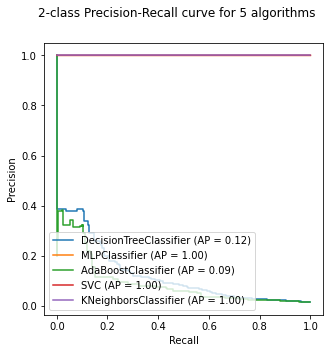

In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_precision_recall_curve
from imblearn.pipeline import Pipeline
import numpy as np
import os

##train_five_models####
neigh = KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='kd_tree')
base_estimator = tree.DecisionTreeClassifier(min_impurity_decrease=1e-03)
abc =AdaBoostClassifier(n_estimators=60, base_estimator=base_estimator,learning_rate=1)
clf = tree.DecisionTreeClassifier(min_impurity_decrease=1e-04)
MLP = MLPClassifier(hidden_layer_sizes=(5,7,7),activation ='tanh',solver='sgd',max_iter=160)
svm = SVC(gamma='auto',kernel='linear',probability=True)

#extract data
raw_df = pd.read_csv("~/ML_class_projects/a_1/BitcoinHeistData.csv")
cleaned_df = raw_df.copy()


#clean the data
cleaned_df['class']=np.array([0 if x=='white' else 1 for x in cleaned_df.pop('label')])
cleaned_df.pop("address")
cleaned_df.pop("year")
cleaned_df.pop("day")

train_df, test_df = train_test_split(cleaned_df, test_size=0.2)

#extract data for decision_tree
X_train_for_tree = np.array(train_df.iloc[:,:-1])
y_train_for_tree = np.array(train_df['class'])
X_test_for_tree = np.array(test_df.iloc[:,:-1])
y_test_for_tree =np.array(test_df['class'])

#extract data for other algorithms
eps=0.001 # 0 => 0.1¢
train_df['Log income'] = np.log(train_df.pop('income')+eps)
train_df['Log weight'] = np.log(train_df.pop('weight')+eps)
test_df['Log income'] = np.log(test_df.pop('income')+eps)
test_df['Log weight'] = np.log(test_df.pop('weight')+eps)
y_train_for_others=np.array(train_df['class'])
X_train_for_others=np.array(train_df.iloc[:,:-1])
y_test_for_others=np.array(test_df['class'])
X_test_for_others=np.array(test_df.iloc[:,:-1])
scaler = StandardScaler()
X_train_for_others = scaler.fit_transform(X_train_for_others)
X_test_for_others = scaler.fit_transform(X_test_for_others)


#define the undersampling method
under = RandomUnderSampler(sampling_strategy=0.5)
X_train_for_tree_under,y_train_for_tree_under = under.fit_resample(X_train_for_tree,y_train_for_tree)
X_train_for_others_under,y_train_for_others_under = under.fit_resample(X_train_for_others,y_train_for_others)

compare_graph,axs =  plt.subplots(1, 1, figsize=(5, 5), sharey=True)
clf.fit(X_train_for_tree_under,y_train_for_tree_under)
MLP.fit(X_train_for_others_under,y_train_for_others_under)
abc.fit(X_train_for_tree_under,y_train_for_tree_under)
svm.fit(X_train_for_others_under,y_train_for_others_under)
neigh.fit(X_train_for_others_under,y_train_for_others_under)

plot_precision_recall_curve(clf, X_test_for_tree, y_test_for_tree,ax = axs)
plot_precision_recall_curve(MLP, X_test_for_others, y_test_for_others,ax = axs)
plot_precision_recall_curve(abc, X_test_for_tree, y_test_for_tree,ax = axs)
plot_precision_recall_curve(svm, X_test_for_others, y_test_for_others,ax = axs)
plot_precision_recall_curve(neigh, X_test_for_others, y_test_for_others,ax = axs)
compare_graph.suptitle('2-class Precision-Recall curve for 5 algorithms ')




Text(0.5, 0.98, '2-class Precision-Recall curve for 5 algorithms ')

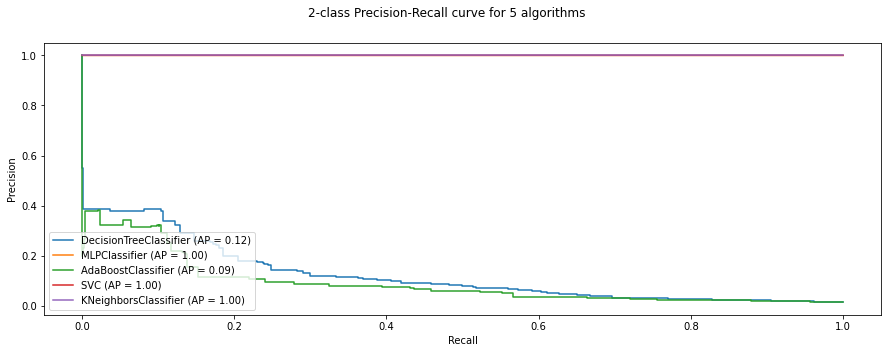

In [16]:
compare_graph,axs =  plt.subplots(1, 1, figsize=(15,5), sharey=True)
plot_precision_recall_curve(clf, X_test_for_tree, y_test_for_tree,ax = axs)
plot_precision_recall_curve(MLP, X_test_for_others, y_test_for_others,ax = axs)
plot_precision_recall_curve(abc, X_test_for_tree, y_test_for_tree,ax = axs)
plot_precision_recall_curve(svm, X_test_for_others, y_test_for_others,ax = axs)
plot_precision_recall_curve(neigh, X_test_for_others, y_test_for_others,ax = axs)
compare_graph.suptitle('2-class Precision-Recall curve for 5 algorithms ')

Text(0.5, 0.98, '2-class Precision-Recall curve for 5 algorithms ')

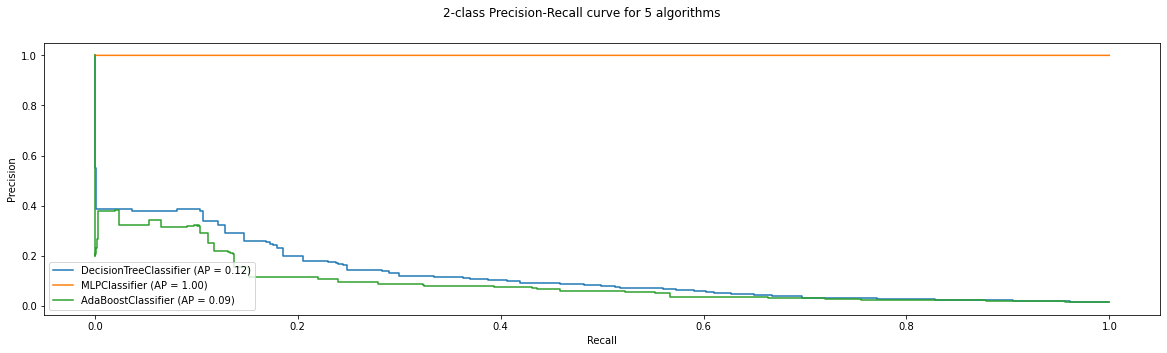

In [17]:
compare_graph.savefig("compare 5 algorithms for bitcoin transaction data")